In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
male = df[df['sex']=='male']
female = df[df['sex']=='female']
print(male)

      age   sex     bmi  children smoker     region      charges
1      18  male  33.770         1     no  southeast   1725.55230
2      28  male  33.000         3     no  southeast   4449.46200
3      33  male  22.705         0     no  northwest  21984.47061
4      32  male  28.880         0     no  northwest   3866.85520
8      37  male  29.830         2     no  northeast   6406.41070
...   ...   ...     ...       ...    ...        ...          ...
1324   31  male  25.935         1     no  northwest   4239.89265
1325   61  male  33.535         0     no  northeast  13143.33665
1327   51  male  30.030         1     no  southeast   9377.90470
1329   52  male  38.600         2     no  southwest  10325.20600
1333   50  male  30.970         3     no  northwest  10600.54830

[676 rows x 7 columns]


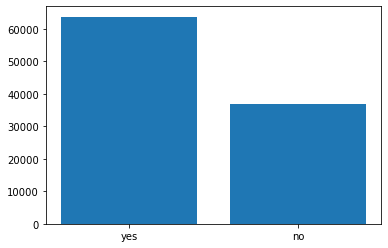

In [7]:
plt.figure()
plt.bar(df.smoker, df.charges)
plt.show()

In [8]:
#Distribution of BMI
bmi_agg = df.bmi.aggregate(['mean', 'median', 'min', 'max', 'sum'])
bmi_agg

mean         30.663397
median       30.400000
min          15.960000
max          53.130000
sum       41027.625000
Name: bmi, dtype: float64

In [9]:
# Changing columns sex and smoker to numrical variables
#sex_dict = {'male': 1, 'female': 0}
#smoker_dict = {'yes': 1, 'no': 0}

#df['sex'] = df['sex'].map(sex_dict)
#df['smoker'] = df['smoker'].map(smoker_dict)

In [10]:
#df.head()

In [11]:
#rom sklearn.preprocessing import LabelEncoder
#ncoder = LabelEncoder()
#ncoder.fit_

In [12]:
#Examining the distribution of BMI
bmi = df['bmi'].value_counts()
print(bmi)

bmi_count = df.groupby('sex')['bmi'].value_counts()


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


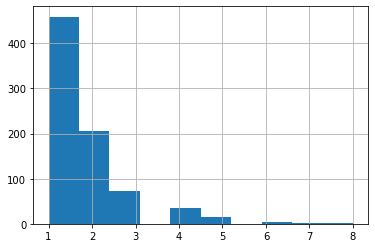

In [13]:
plt.figure()
bmi_count.hist()
plt.show()

In [14]:
# Relationship between smoker and region
#smoke_reg = df.groupby('smoker').region.value_counts().sort_values()
#smoke_reg

smoker = df[df['smoker'] == 'yes']
smoker_reg = smoker['region'].value_counts(normalize=True)

#dataframe where df['smoker'] == no
non_smoker = df[df['smoker'] =='no']
non_smoker_reg = non_smoker['region'].value_counts(normalize=True)
print('The proportion of smokers in the different region is:\n', smoker_reg)
print('The proportion of non smokers in the different region is:\n', non_smoker_reg)

The proportion of smokers in the different region is:
 southeast    0.332117
northeast    0.244526
southwest    0.211679
northwest    0.211679
Name: region, dtype: float64
The proportion of non smokers in the different region is:
 southeast    0.256579
northwest    0.250940
southwest    0.250940
northeast    0.241541
Name: region, dtype: float64


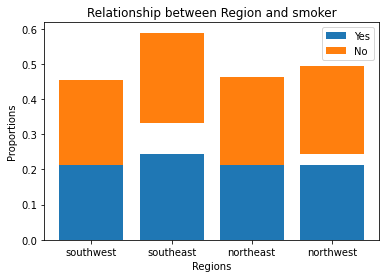

In [15]:
plt.figure()
plt.bar(smoker['region'].unique(), smoker_reg, label='Yes')
plt.bar(non_smoker['region'].unique(), non_smoker_reg, bottom=smoker_reg, label='No')
plt.xlabel('Regions')
plt.ylabel('Proportions')
plt.title('Relationship between Region and smoker')
plt.legend()
plt.show()

In [16]:
#Relationship between BMI and sex
df.groupby('sex')['bmi'].agg(['mean', 'median', 'sum', 'max', 'min'])

male = df[df['sex'] == 'male']
male
male['bmi'].value_counts().sort_values(ascending=False)



32.300    8
30.875    7
25.460    6
34.100    6
28.310    5
         ..
42.655    1
41.800    1
26.180    1
21.500    1
30.970    1
Name: bmi, Length: 391, dtype: int64

In [17]:
#Examining the relationship between smokers and charges
charges = df.groupby('smoker')['charges'].max()
print(charges)

smoker
no     36910.60803
yes    63770.42801
Name: charges, dtype: float64


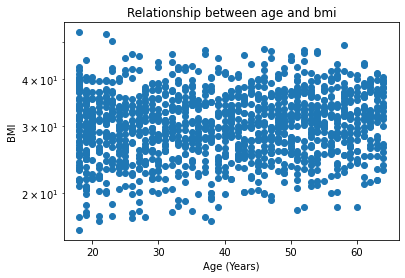

In [18]:
#Relationship between age and bmi
plt.figure()
plt.scatter(df['age'], df['bmi'])
plt.xlabel('Age (Years)')
plt.ylabel('BMI')
plt.title('Relationship between age and bmi')
plt.yscale('log')
plt.show()

In [19]:
print(df['age'].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


In [20]:
mean_bmi = df.groupby('age')['bmi'].mean()
mean_bmi

age
18    31.326159
19    28.596912
20    30.632759
21    28.185714
22    31.087679
23    31.454464
24    29.142679
25    29.693929
26    29.428929
27    29.333571
28    29.482143
29    29.383148
30    30.557593
31    29.918333
32    31.597692
33    31.163077
34    30.274038
35    31.394800
36    29.374200
37    31.216600
38    28.996600
39    29.910200
40    30.139074
41    31.506852
42    30.328148
43    30.204444
44    30.844259
45    29.778966
46    31.340862
47    30.664310
48    31.925690
49    30.313929
50    31.132241
51    31.727069
52    32.936034
53    30.360893
54    31.234286
55    31.950000
56    31.600962
57    30.844423
58    32.718200
59    30.572000
60    30.332826
61    32.548261
62    32.342609
63    31.923478
64    32.976136
Name: bmi, dtype: float64

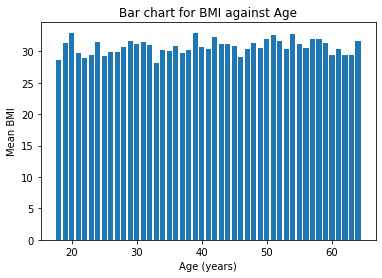

In [21]:
plt.figure()
plt.bar(df['age'].unique(), mean_bmi)
plt.xlabel('Age (years)')
plt.ylabel('Mean BMI')
plt.title('Bar chart for BMI against Age')
plt.show()

In [22]:
# Considering the BMI for the younger people
young_age = df[df['age'] <= 50]
young_age

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1331,23,female,33.400,0,no,southwest,10795.93733
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [23]:
#young_age.groupby('age')['bmi'].count().plot.bar()

In [24]:
old_age = df[df['age'] > 50]
old_age

,age,sex,bmi,children,smoker,region,charges
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
13,56,female,39.82,0,no,southeast,11090.71780
16,52,female,30.78,1,no,northeast,10797.33620
18,56,male,40.30,0,no,southwest,10602.38500
...,...,...,...,...,...,...,...
1327,51,male,30.03,1,no,southeast,9377.90470
1329,52,male,38.60,2,no,southwest,10325.20600
1330,57,female,25.74,2,no,southeast,12629.16560
1332,52,female,44.70,3,no,southwest,11411.68500


<AxesSubplot:title={'center':'Relationship between old age group and the Body Mass Index'}, xlabel='age', ylabel='BMI counts'>

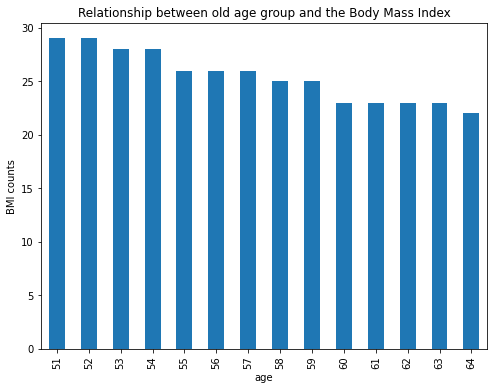

In [28]:
plt.figure(figsize=(8, 6))

old_age.groupby('age').bmi.count().plot.bar(ylabel='BMI counts', title='Relationship between old age group and the Body Mass Index')

In [29]:
most_children = df.groupby('region').children.value_counts().sort_values(ascending=False)
most_children

region     children
southeast  0           157
northeast  0           147
southwest  0           138
northwest  0           132
southeast  1            95
southwest  1            78
northeast  1            77
northwest  1            74
           2            66
southeast  2            66
southwest  2            57
northeast  2            51
northwest  3            46
northeast  3            39
southwest  3            37
southeast  3            35
southwest  5             8
northeast  4             7
southwest  4             7
northwest  4             6
southeast  5             6
           4             5
northeast  5             3
northwest  5             1
Name: children, dtype: int64

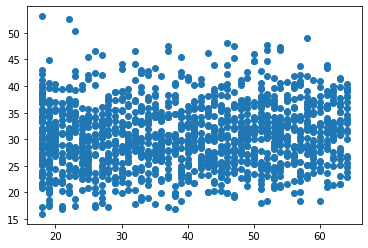

In [30]:
plt.figure()
plt.scatter(df['age'], df['bmi'])
#plt.yscale('log')
plt.show()

In [31]:
#Relationship between age and bmi
age_unique = df['age'].unique()
age_unique

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

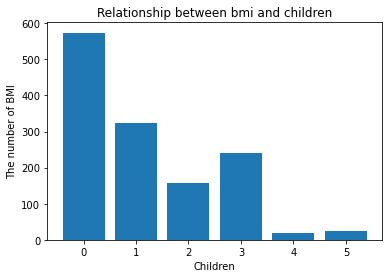

In [34]:
#Relationship between bmi and children
bmi_count = df.groupby('children').children.count()
children_set = df.children.unique()

plt.figure()
plt.bar(children_set, bmi_count)
plt.xlabel('Children')
plt.ylabel('The number of BMI')
plt.title('Relationship between bmi and children')
plt.show()

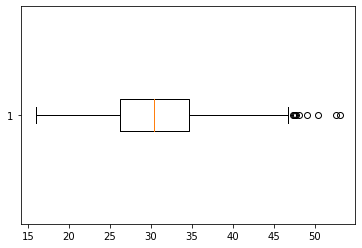

In [35]:
plt.figure()

plt.boxplot(df['bmi'], vert=False)
plt.show()

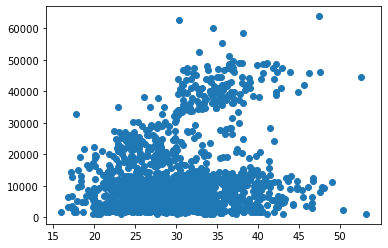

0.19834096883362887


In [36]:
#Relationship between BMI and charges
plt.figure()
plt.scatter(df['bmi'], df['charges'])
#plt.yscale('log')
plt.show()


print(df['charges'].corr(df['bmi']))

In [37]:
#Relationship between “region”, “smoker” and “bmi”
df_smoke = df.smoker.unique()
df_smoke

array(['yes', 'no'], dtype=object)

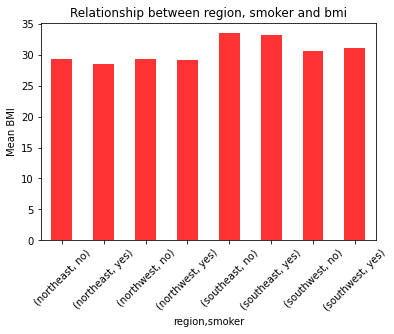

In [38]:
df.groupby(['region','smoker']).bmi.mean().plot.bar(color='red', alpha=0.8)
plt.ylabel('Mean BMI')
plt.title('Relationship between region, smoker and bmi')
plt.xticks(rotation=45);

# Data Preprocessing

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [40]:
df_cat = df[['sex', 'smoker']]
df1 = df.drop(['sex', 'smoker'], axis=1)

In [41]:
encoder = LabelEncoder()
df1_reg = encoder.fit_transform(df1['region'])
df1_reg = np.array(df1_reg)
df1_reg.dtype
df2 = pd.DataFrame(df1_reg, columns=['region'])
df2

,region
0,3
1,2
2,2
3,1
4,1
...,...
1333,1
1334,0
1335,2
1336,3


In [42]:
one_hot = OneHotEncoder()

In [43]:
print(df_cat.head())

      sex smoker
0  female    yes
1    male     no
2    male     no
3    male     no
4    male     no


In [44]:
df_cat_hot = one_hot.fit_transform(df_cat)
df1_cat = df_cat_hot.toarray()
df3 = pd.DataFrame(df1_cat, columns=['sex_female', 'sex_male', 'smoker_yes', 'smoker_no'])
df3

,sex_female,sex_male,smoker_yes,smoker_no
0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
1333,0.0,1.0,1.0,0.0
1334,1.0,0.0,1.0,0.0
1335,1.0,0.0,1.0,0.0
1336,1.0,0.0,1.0,0.0


In [45]:
df1 = df1.drop('region', axis=1)
df1.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [46]:
df = df1.join([df2, df3])
df.head()

,age,bmi,children,charges,region,sex_female,sex_male,smoker_yes,smoker_no
0,19,27.900,0,16884.92400,3,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,2,0.0,1.0,1.0,0.0
2,28,33.000,3,4449.46200,2,0.0,1.0,1.0,0.0
3,33,22.705,0,21984.47061,1,0.0,1.0,1.0,0.0
4,32,28.880,0,3866.85520,1,0.0,1.0,1.0,0.0


In [47]:
X = df.drop('charges', axis=1)
y = df['charges']

In [48]:
print(X.shape, y.shape)

(1338, 8) (1338,)


# Splitting the data

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.head())

     age     bmi  children  region  sex_female  sex_male  smoker_yes  \
332   61  31.160         0       1         1.0       0.0         1.0   
355   46  27.600         0       3         0.0       1.0         1.0   
138   54  31.900         3       2         1.0       0.0         1.0   
381   55  30.685         0       0         0.0       1.0         0.0   
292   25  45.540         2       2         0.0       1.0         0.0   

     smoker_no  
332        0.0  
355        0.0  
138        0.0  
381        1.0  
292        1.0  


# Sclaing the dataset

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

[[ 1.54446486  0.10318223 -0.91501097 ... -1.02597835  0.51298918
  -0.51298918]
 [ 0.48187425 -0.4908445  -0.91501097 ...  0.97467943  0.51298918
  -0.51298918]
 [ 1.04858924  0.2266597   1.56027883 ... -1.02597835  0.51298918
  -0.51298918]
 ...
 [ 1.33194673 -0.8954835  -0.91501097 ...  0.97467943  0.51298918
  -0.51298918]
 [-0.15568012  2.84638435  0.73518223 ... -1.02597835 -1.94935887
   1.94935887]
 [ 1.11942861 -0.10706319 -0.91501097 ...  0.97467943  0.51298918
  -0.51298918]]


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score



In [53]:
linreg = LinearRegression()
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.14, random_state=12)
ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.01)
models = [('Linear Regression', linreg),
          ('Decision_tree', dt),
          ('Ridge Regression', ridge),
          ('Lasso Regression', lasso)]

for model_name, model  in models:
    mse_cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
   # print(mse_cv_scores)
    #best_model = mse_cv_scores.best_estimator_
    rmse_cv_scores = (-mse_cv_scores.mean())**(1/2)
    print(model_name, rmse_cv_scores)
    #y_pred = model.predict(X_test)
    #accuracy = r2_score(y_test, y_pred)
    #accuracy = np.sqrt(MSE(y_test, y_pred))
    #print('{:s}: {:.3f}'.format(model_name, accuracy))

Linear Regression 6189.301583605564
Decision_tree 6869.129628773377
Ridge Regression 6189.281084738125
Lasso Regression 6189.300541532117


In [54]:
#print(model.score(X_test, y_test))

# Hyperparameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
params_dt ={dt : {'max_depth' : [3, 4, 5, 6], 'min_samples_leaf' : [0.04, 0.06, 0.08], 'max_features' : [0.2, 0.4, 0.6, 0.8]},
            ridge : {'alpha': [0.1, 1.0, 10.0, 100.0]},
            lasso : {'alpha': [0.001, 0.01, 0.1, 1.0]},
            }

In [62]:
for model, params in params_dt.items():
    grid_dt = GridSearchCV(estimator= model, param_grid= params, scoring='accuracy', cv=10, n_jobs=-1)
    grid_dt.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
